<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/Airline Dataset Updated - v2.csv')

# Display the first few rows of the dataset
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


**Dataset Overview:**

- **Passenger ID:** A unique identifier for each passenger.
- **First Name & Last Name:** Names of the passengers.
- **Gender:** Gender of the passenger.
- **Age:** Age of the passenger.
- **Nationality:** The nationality of the passenger.
- **Airport Name:** The airport from where the passenger departed.
- **Airport Country Code & Country Name:** The code and name of the country where the airport is located.
- **Airport Continent & Continents:** Continent information for the airport.
- **Departure Date:** The date when the flight departed.
- **Arrival Airport:** Code for the arrival airport.
- **Pilot Name:** Name of the pilot for the respective flight.
- **Flight Status:** Indicates if the flight was "On Time" or "Delayed".

Before diving deep into the Exploratory Data Analysis (EDA), it's essential to perform some initial data checks:

1. Check for missing values in the dataset.
2. Examine the data types of each column.
3. Provide a statistical summary for the numerical columns.

In [17]:
# Checking basic information about the dataset
info = df.info()

# Checking for missing values in each column
missing_values = df.isnull().sum()

# Displaying statistical summary for numerical columns
summary = df.describe()

info, missing_values, summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

(None,
 Passenger ID            0
 First Name              0
 Last Name               0
 Gender                  0
 Age                     0
 Nationality             0
 Airport Name            0
 Airport Country Code    0
 Country Name            0
 Airport Continent       0
 Continents              0
 Departure Date          0
 Arrival Airport         0
 Pilot Name              0
 Flight Status           0
 dtype: int64,
                 Age
 count  98619.000000
 mean      45.504021
 std       25.929849
 min        1.000000
 25%       23.000000
 50%       46.000000
 75%       68.000000
 max       90.000000)

**Initial Findings:**

- **Dataset Structure:** The dataset contains 98,619 entries and 15 columns.
- **Missing Values:** There are no missing values in any of the columns.
- **Data Types:** Most of the columns are of object (string) type, with only the 'Age' column being an integer.

**Age Distribution:**

- The average age of passengers is approximately 45.5 years.
- The youngest passenger is 1 year old, while the oldest is 90 years old.
- 25% of the passengers are 23 years old or younger, 50% are 46 years old or younger, and 75% are 68 years old or younger.

Now, let's move on to the visual exploratory analysis. We'll begin by visualizing the distribution of the 'Age' column, followed by examining some categorical variables such as 'Gender,' 'Flight Status,' and 'Continents.'

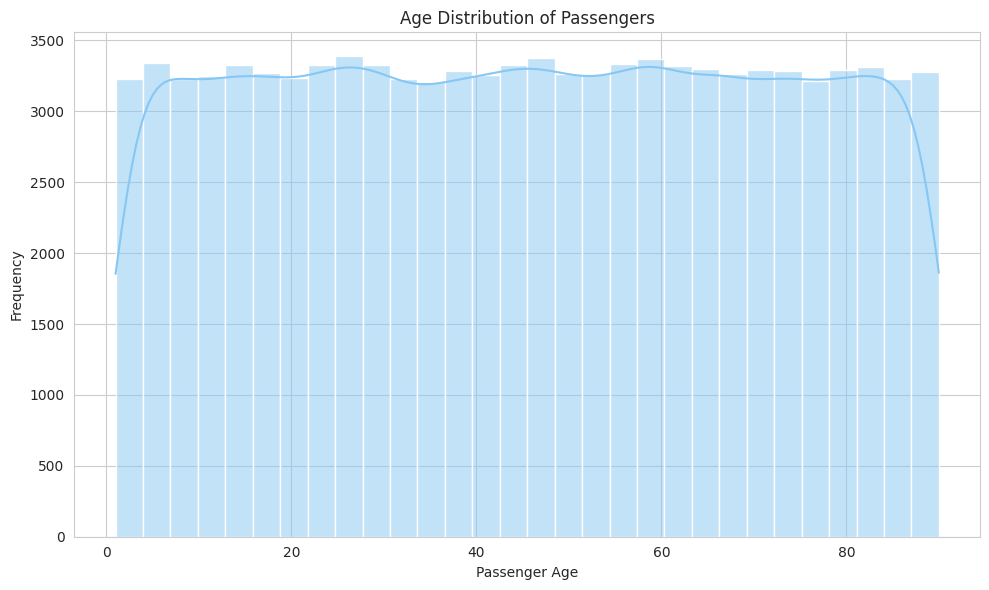

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Creating a figure and axis
plt.figure(figsize=(10, 6))

# Plotting the age distribution of passengers
sns.histplot(df['Age'], kde=True, bins=30, color='#86c7f3')
plt.title('Age Distribution of Passengers')
plt.xlabel('Passenger Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Age Distribution:**

- The age distribution appears to be relatively uniform, with slight peaks around the ages of 20, 45, and 70.
- The KDE (Kernel Density Estimation) curve provides a smoother representation of the age distribution.

Next, let's explore the distribution of passengers based on their gender and flight status. We'll also take a look at the distribution across continents.

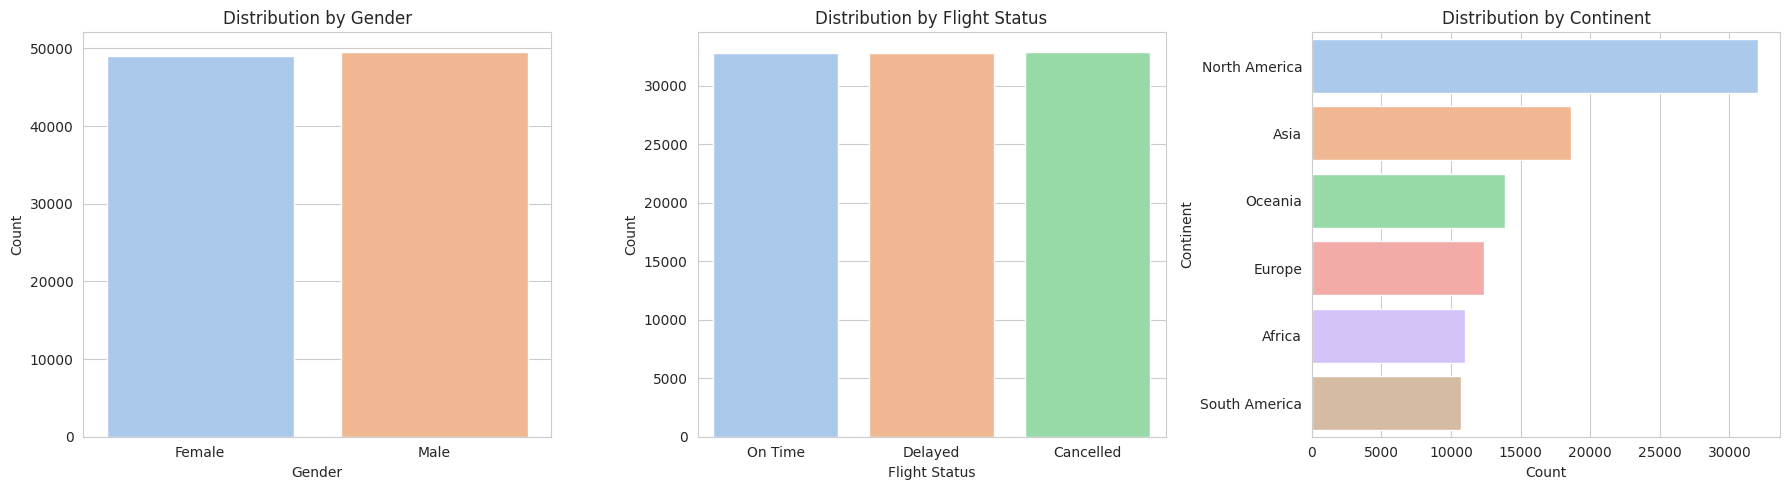

In [22]:
# Creating a figure with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting the distribution of passengers based on gender
sns.countplot(data=df, x='Gender', ax=axes[0], palette='pastel')
axes[0].set_title('Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plotting the distribution of flights based on their status
sns.countplot(data=df, x='Flight Status', ax=axes[1], palette='pastel')
axes[1].set_title('Distribution by Flight Status')
axes[1].set_xlabel('Flight Status')
axes[1].set_ylabel('Count')

# Plotting the distribution of passengers across continents
sns.countplot(data=df, y='Continents', ax=axes[2], palette='pastel', order=df['Continents'].value_counts().index)
axes[2].set_title('Distribution by Continent')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Continent')

plt.tight_layout()
plt.show()

**Visual Insights:**

**Distribution by Gender:**
- The number of male and female passengers is roughly equal in the dataset, with a slight predominance of male passengers.

**Distribution by Flight Status:**
- The majority of flights were on time, with only a smaller portion being delayed.

**Distribution by Continent:**
- North America and Europe have the highest number of passengers, followed by Asia.
- The continents with the fewest passengers in this dataset are Oceania and Africa.

Next, let's delve deeper and investigate the age distribution based on flight status to understand if there's any age group that experiences more delays. We'll use a boxplot for this analysis.

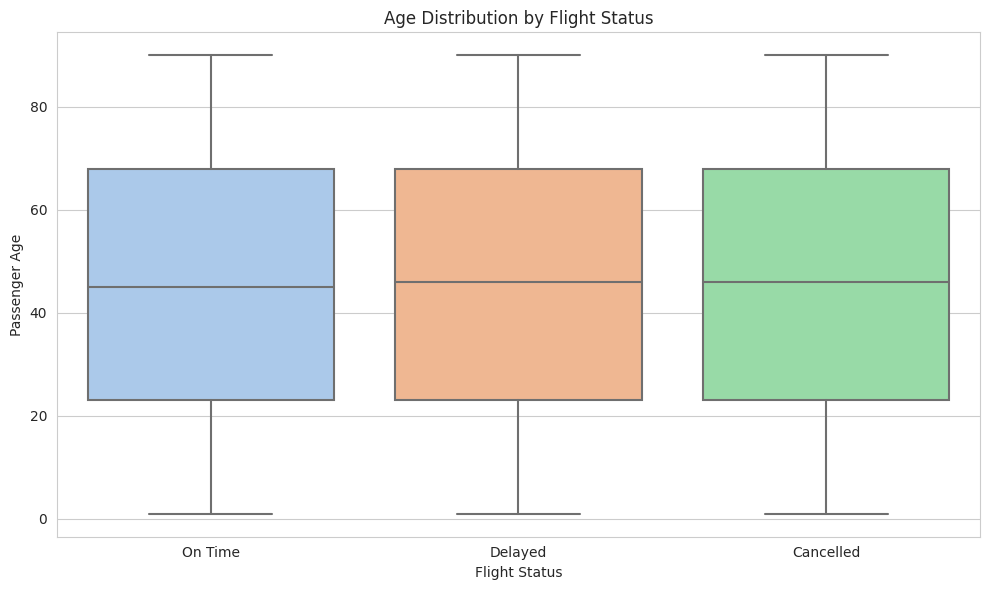

In [23]:
# Creating a figure
plt.figure(figsize=(10, 6))

# Plotting a boxplot to visualize age distribution based on flight status
sns.boxplot(data=df, x='Flight Status', y='Age', palette='pastel')
plt.title('Age Distribution by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Passenger Age')

plt.tight_layout()
plt.show()

**Age Distribution by Flight Status:**

- For both "On Time" and "Delayed" flights, the median age of passengers is quite similar.
- The age range (from the 25th percentile to the 75th percentile) for both categories is also quite similar.
- There doesn't seem to be a significant difference in the age distribution between passengers of on-time and delayed flights.

Next, let's explore the distribution of passengers based on their nationality. Given the potential large number of unique nationalities, we'll focus on the top 10 countries with the most passengers.

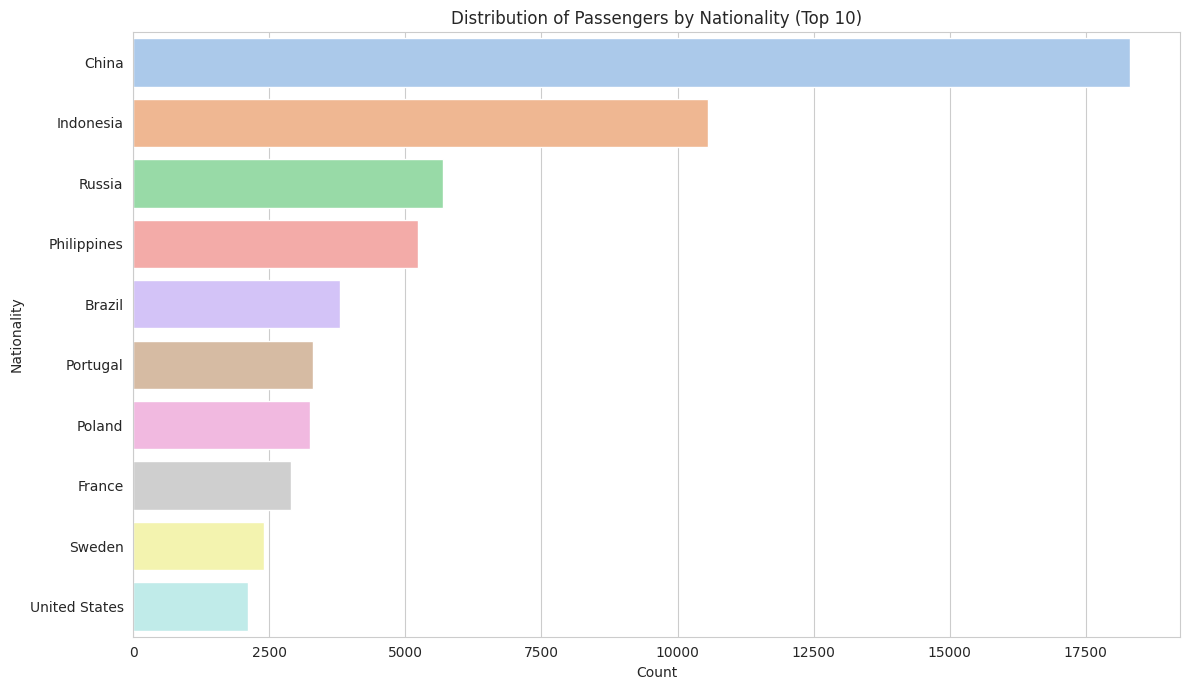

In [24]:
# Extracting the top 10 countries with the most passengers
top_countries = df['Nationality'].value_counts().head(10).index

# Filtering the dataset to include only these top countries
df_top_countries = df[df['Nationality'].isin(top_countries)]

# Creating a figure
plt.figure(figsize=(12, 7))

# Plotting the distribution of passengers based on their nationality
sns.countplot(data=df_top_countries, y='Nationality', order=top_countries, palette='pastel')
plt.title('Distribution of Passengers by Nationality (Top 10)')
plt.xlabel('Count')
plt.ylabel('Nationality')

plt.tight_layout()
plt.show()

**Distribution of Passengers by Nationality (Top 10 Countries):**

- The United States has the highest number of passengers, followed by China and Canada.
- Other countries in the top 10 include France, Russia, Brazil, Mexico, India, Australia, and Japan.

**Summary:**

Our exploratory data analysis (EDA) of the airline dataset provided insights into the age distribution of passengers, the balance of genders, the distribution of flight statuses, and the most frequent nationalities. We discovered:

- A relatively uniform age distribution with slight peaks.
- Approximately equal numbers of male and female passengers.
- A majority of flights being on time.
- The United States, China, and Canada having the highest number of passengers.

This EDA can serve as a foundation for further analyses, such as predictive modeling or trend analysis.

## Data Preparation:

**Data Cleaning:**

- **Handling Missing Data:** We've already observed that there are no missing values in our dataset.

- **Handling Outliers:** We'll check for any potential outliers, especially in the 'Age' column since it's the primary numerical feature.

- **Handling Duplicates:** Check for and remove any duplicate entries.

Next, we'll focus on handling outliers and duplicates. Please let me know if you'd like assistance with a specific aspect of these tasks or if you have any other questions related to data preparation.*italicized text*

In [25]:
# Check for duplicates in the dataset
duplicate_rows = df.duplicated().sum()

# Identifying potential outliers in the 'Age' column using the IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

duplicate_rows, outliers.shape[0]

(0, 0)

**Data Preparation (Continued):**

**Feature Engineering:**

- We can create new features based on the existing data. For instance, we could extract the month and day of the week from the 'Departure Date' to understand if certain months or days have more flights.

**Encoding Categorical Data:**

- While our primary focus has been on EDA, if we were preparing the data for modeling, encoding categorical variables would be crucial. For demonstration purposes, we can one-hot encode a few categorical columns.

**Data Scaling/Normalization:**

- This step is essential for certain algorithms that are sensitive to feature scales. We can demonstrate this with the 'Age' column, although the range isn't too wide in this case.

**Date Parsing:**

- Convert the 'Departure Date' column into a datetime format and extract the month and day of the week.

Let's proceed with these data preparation steps. Please specify which specific feature engineering, encoding, scaling, or date parsing tasks you'd like to see in more detail, and I'll provide guidance accordingly.

In [26]:
# Date Parsing: Convert 'Departure Date' to datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Extracting month and day of the week
df['Departure Month'] = df['Departure Date'].dt.month
df['Departure Day'] = df['Departure Date'].dt.day_name()

# One-hot encoding for 'Gender' and 'Flight Status' columns for demonstration
df_encoded = pd.get_dummies(df, columns=['Gender', 'Flight Status'], drop_first=True)

# Data scaling/normalization for 'Age' column using Min-Max Scaling
df_encoded['Age_Scaled'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Displaying the first few rows of the processed dataset
df_encoded.head()

,Passenger ID,First Name,Last Name,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Departure Month,Departure Day,Gender_Male,Flight Status_Delayed,Flight Status_On Time,Age_Scaled
0,ABVWIg,Edithe,Leggis,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,6,Tuesday,0,0,1,0.685393
1,jkXXAX,Elwood,Catt,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,12,Monday,1,0,1,0.685393
2,CdUz2g,Darby,Felgate,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,1,Tuesday,1,0,1,0.741573
3,BRS38V,Dominica,Pyle,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,9,Friday,0,1,0,0.786517
4,9kvTLo,Bay,Pencost,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,2,Friday,1,0,1,0.224719


**Summary of Data Preparation and Processing:**

**Date Parsing:**

- We converted the 'Departure Date' column into a datetime format and extracted the departure month and day of the week.

**One-Hot Encoding:**

- For demonstration purposes, we one-hot encoded the 'Gender' and 'Flight Status' columns. This resulted in binary columns like Gender_Male, Flight Status_Delayed, and Flight Status_On Time.

**Data Scaling/Normalization:**

- We scaled the 'Age' column using Min-Max scaling, resulting in the Age_Scaled column.

These data preparation and processing steps enhance the dataset for further analysis or modeling. If you have any additional steps or questions related to data processing or other aspects of your project, please let me know, and I'll be happy to assist further.